# Exprésate Perú con Datos 2024 - GORE CALLAO

## Dataset: [Registros delictivos del Observatorio Regional de Seguridad Ciudadana en la Provincia Constitucional del Callao](https://expresateperu.datosabiertos.gob.pe/dataset/registros-delictivos-del-observatorio-regional-de-seguridad-ciudadana-en-la-provincia)

## Realizado por : [Diego Teccsi Cerda](https://www.linkedin.com/in/diego-teccsi/)

In [112]:
#!pip install contextily

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import folium
from folium.plugins import HeatMap

### Carga de datos

In [157]:
# Cargar el archivo CSV
file_path = r'..\data\processed\datos_seguridad.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
df.head()

,FECHA_CORTE,FECHA_REGISTRO,ID_DOC_DENUNCIA,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_DE_DENUNCIA,SITUACION_DENUNCIA,TIPO,...,FECHA_NACIMIENTO,EDAD_PERSONA,SEXO,ESTADO_CIVIL,GRADO_INSTRUCCION,OCUPACION,PAIS_NATAL,MES,LONGITUD,LATITUD
0,2024-04-25,2024-02-26,4e35831afdd9aa1958807a7b32ea5b53a26aa74d1556d5...,70101,CALLAO,CALLAO,CALLAO,DENUNCIA,PENDIENTE,VIOLENCIA A MUJERES Y GGVV,...,1990-07-13,33,MASCULINO,SOLTERO,NO INDICA,NO INDICA,PERU,202402,-77.115782,-12.005028
1,2024-04-25,2024-02-21,7ccf55ed76f62bc29e46f082caa7e57c289dc59bded9d8...,70101,CALLAO,CALLAO,CALLAO,DENUNCIA,RESUELTA,VIOLENCIA A MUJERES Y GGVV,...,1985-01-29,39,MASCULINO,SOLTERO,NO INDICA,NO INDICA,PERU,202402,-77.154571,-11.844027
2,2024-04-25,2024-02-10,fed71611056418d9ebbda0717e8252554c85b3b08f34fa...,70101,CALLAO,CALLAO,CALLAO,DENUNCIA,RESUELTA,VIOLENCIA A MUJERES Y GGVV,...,1993-10-21,30,MASCULINO,SOLTERO,NO INDICA,NO INDICA,PERU,202402,-77.126113,-12.051164
3,2024-04-25,2024-02-20,7d920f96de74cf295cbbb4da54057db724c98421ffa0a1...,70101,CALLAO,CALLAO,CALLAO,DENUNCIA,RESUELTA,VIOLENCIA A MUJERES Y GGVV,...,1985-06-06,38,MASCULINO,SOLTERO,NO INDICA,VIGILANTE,PERU,202402,-77.129483,-11.951019
4,2024-04-25,2024-02-23,060b191856ee7bf4feb80322d9c04ff36bbc99eaa75075...,70101,CALLAO,CALLAO,CALLAO,INTERVENCION,RESUELTA,PATRIMONIO,...,1995-09-26,28,MASCULINO,SOLTERO,NO INDICA,NO INDICA,PERU,202402,-77.125383,-12.051164


### Estilizar una muestra de la tabla

In [158]:
# Estilizar la tabla para mostrarlo en la web

columnas_seleccionadas = ['FECHA_REGISTRO','DEPARTAMENTO','PROVINCIA','DISTRITO','TIPO_DE_DENUNCIA','SITUACION_DENUNCIA','TIPO','SUBTIPO','MODALIDAD','FECHA_HECHO','HORA_HECHO','UBICACION',
                          'DESCRIPCION','FECHA_NACIMIENTO','EDAD_PERSONA','SEXO','ESTADO_CIVIL','GRADO_INSTRUCCION','OCUPACION','PAIS_NATAL','LONGITUD','LATITUD']

df_muestra = df[columnas_seleccionadas].head(10) # mostrar las primeras 10 filas

# código html de la tabla
html = '''
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Tabla Moderna y Responsive</title>
    <link rel="stylesheet" href="css\styles.css">
</head>
<body>
    <div class="table-container">
        <table class="responsive-table">
            <thead>
                <tr>
'''

for col in columnas_seleccionadas:
    html += f'                    <th>{col}</th>\n'

html += '''
                </tr>
            </thead>
            <tbody>
'''

for index, row in df_muestra.iterrows():
    html += '                <tr>\n'
    for col in columnas_seleccionadas:
        html += f'                    <td>{row[col]}</td>\n'
    html += '                </tr>\n'

html += '''
            </tbody>
        </table>
    </div>
</body>
</html>
'''

# guardar
with open(r'..\docs\table_sample.html', 'w', encoding='utf-8') as file:
    file.write(html)

### Responder preguntas sobre los datos

#### 1. ¿Cuál es la distribución de los tipos de delitos registrados?

Se realiza el análisis generando un gráfico de calor realizando una sumatoria a las variables Tipo y Subtipo.

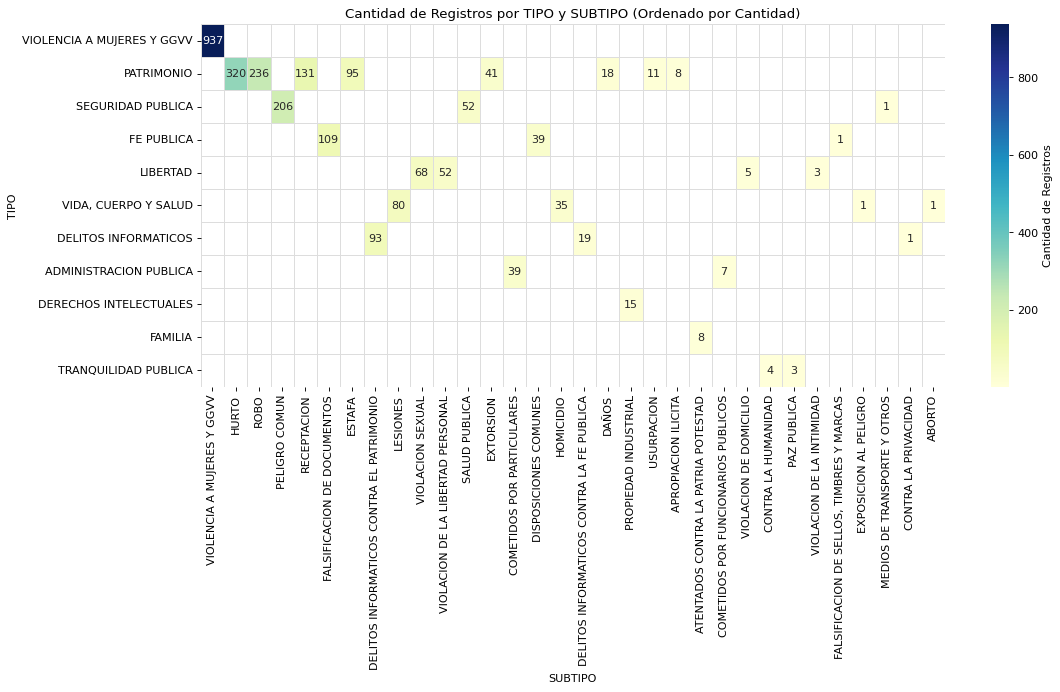

In [159]:
# Agrupando por TIPO y SUBTIPO y contando registros
grouped = df.groupby(['TIPO', 'SUBTIPO']).size().unstack(fill_value=0)

# Ordenando los TIPOS por la suma de sus registros
row_order = grouped.sum(axis=1).sort_values(ascending=False).index

# Ordenando los SUBTIPOS por la suma de sus registros
col_order = grouped.sum(axis=0).sort_values(ascending=False).index

# Reordenando el DataFrame
grouped_sorted = grouped.loc[row_order, col_order]

# Configuración del gráfico de calor para las sumas originales
plt.figure(figsize=(15, 6), dpi=80)
sns.heatmap(grouped_sorted, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, linecolor='#DDDDDD',
            cbar_kws={'label': 'Cantidad de Registros'}, mask=grouped_sorted == 0)

# Títulos y etiquetas
plt.title('Cantidad de Registros por TIPO y SUBTIPO (Ordenado por Cantidad)')
plt.xlabel('SUBTIPO')
plt.ylabel('TIPO')

# Mostrar gráfico
plt.xticks(rotation=90)
plt.show()

Se observa de que los registros sobre 'Violencia a mujeres y grupos vulnerables' alcanza un cantidad de (937 casos), superando hasta 3 veces a la segunda causa más comun (Hurto, 320 casos).
Como este gráfico está muy disperso, se realiza un nuevo gráfico utilizando la escala logaritmica lo que permitirá reducir la amplitud de estas diferencias y hará que los valores más pequeños sean visibles.

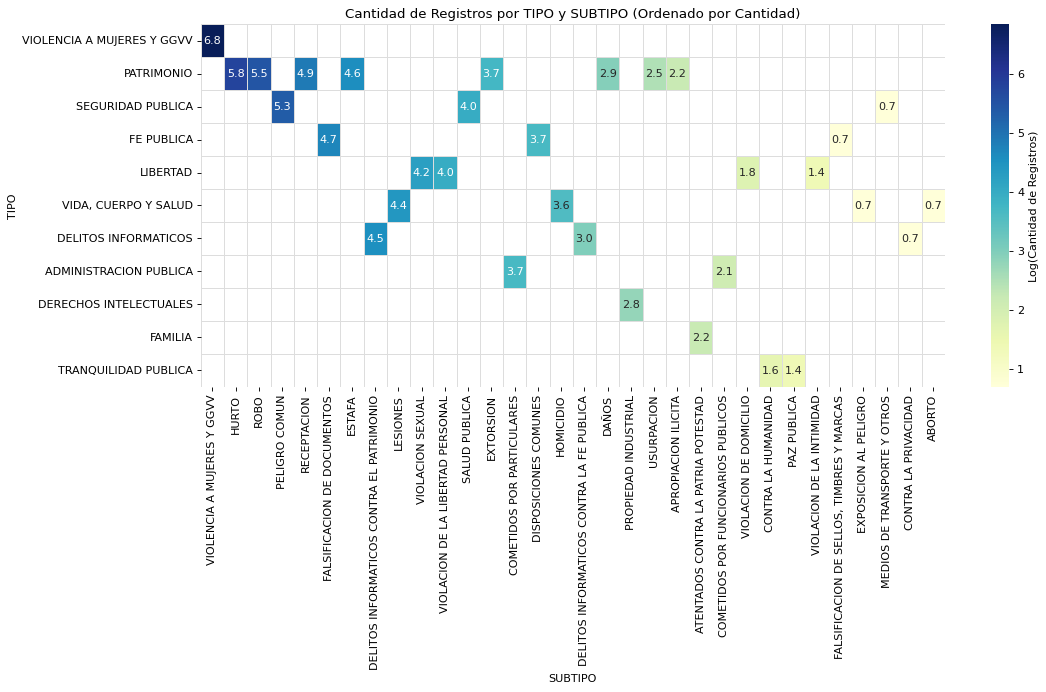

In [160]:
# Agrupando por TIPO y SUBTIPO y contando registros
grouped = df.groupby(['TIPO', 'SUBTIPO']).size().unstack(fill_value=0)

# Aplicando la transformación logarítmica
grouped_log = np.log1p(grouped)  # Usar log1p para evitar log(0)

# Ordenando los TIPOS por la suma de sus registros
row_order = grouped.sum(axis=1).sort_values(ascending=False).index

# Ordenando los SUBTIPOS por la suma de sus registros
col_order = grouped.sum(axis=0).sort_values(ascending=False).index

# Reordenando el DataFrame
grouped_log = grouped_log.loc[row_order, col_order]

# Configuración del gráfico de calor
plt.figure(figsize=(15, 6), dpi=80)
sns.heatmap(grouped_log, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5, linecolor='#DDDDDD',
            cbar_kws={'label': 'Log(Cantidad de Registros)'}, mask=grouped_log==0)

# Títulos y etiquetas
plt.title('Cantidad de Registros por TIPO y SUBTIPO (Ordenado por Cantidad)')
plt.xlabel('SUBTIPO')
plt.ylabel('TIPO')

# Mostrar gráfico
plt.xticks(rotation=90)
plt.show()

Ahora podemos notar que junto al tipo de 'VIOLENCIA A MUJERES Y GGVV' se encuentra los registros relacionados al 'PATRIMONIO' y la 'SEGURIDAD PUBLICA' y para efectos de los siguientes análisis utilizaremos estos tres principales tipos.

In [161]:
tipos_seleccionados = ['VIOLENCIA A MUJERES Y GGVV', 'PATRIMONIO', 'SEGURIDAD PUBLICA', 'FE PUBLICA', 'LIBERTAD', 'VIDA, CUERPO Y SALUD']

# ¿Cómo varía el número de delitos a lo largo del tiempo?

Haciendo una inspección de los datos, he notado que la mayor cantidad de registros por fecha de hecho se situa entre el 20/01/2024 al 01/03/2024.
Por ello es que se realizará un gráfico de barras para comparar en función al tiempo y a los tipos seleccionados.

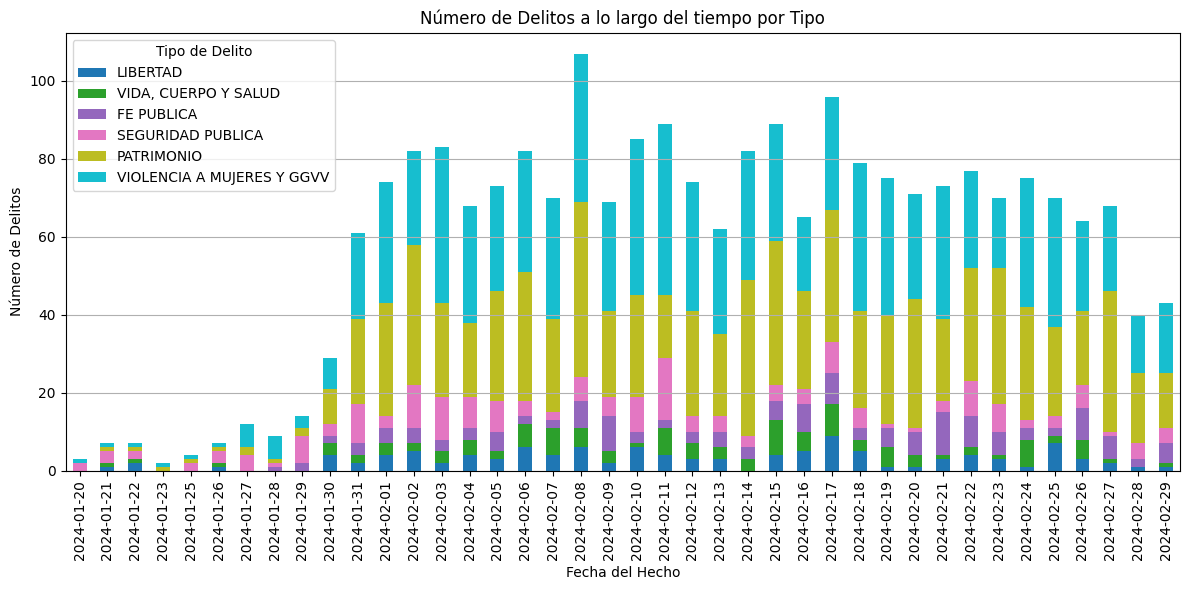

In [162]:
# filtrar los datos
df_filtrado = df[df['TIPO'].isin(tipos_seleccionados)]
df_filtrado = df_filtrado[(df_filtrado['FECHA_HECHO'] >= '2024-01-20') & (df_filtrado['FECHA_HECHO'] < '2024-03-01')]

# agrupar
df_agrupado = df_filtrado.groupby(['FECHA_HECHO', 'TIPO']).size().unstack(fill_value=0)

# ordenar las columnas de acuerdo al total de delitos en cada tipo
df_totales = df_agrupado.sum()
df_ordenado = df_agrupado[df_totales.sort_values().index]

# crear gráfico
plt.figure(figsize=(12, 6), dpi=100)

# aplilar las barras
df_ordenado.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())

# imprimir gráfico
plt.title('Número de Delitos a lo largo del tiempo por Tipo')
plt.xlabel('Fecha del Hecho')
plt.ylabel('Número de Delitos')
plt.legend(title='Tipo de Delito')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Con esta visualización podemos confirmar que los delitos de 'VIOLENCIA A MUJERES Y GGVV' y 'PATRIMONIO' son los problemas más recurrentes en la región Callao, seguido de cerda de la 'SEGURIDAD PUBLICA'
Sobre el primero se recomienda el desarrollo o expansión de programas de prevención y sensibilización.

Ahora se va a analizar visualmente donde ocurren los casos de VIOLENCIA A MUJERES Y GGVV

In [ ]:
# Filtrar los datos por tipo de violencia contra la mujer
df_filtrado = df[df['TIPO'] == 'VIOLENCIA A MUJERES Y GGVV']

Generaré un gráfico de puntos sobre un mapa para encontrar algún patrón.

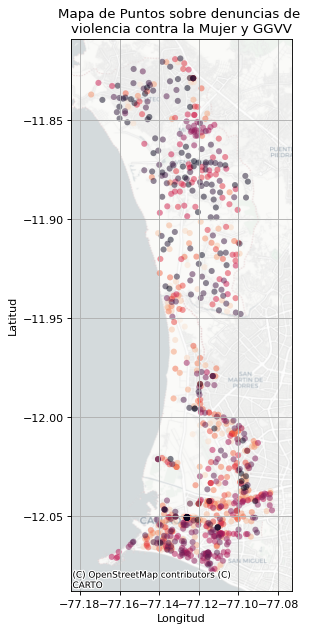

In [231]:
# Filtrar los datos por tipo de violencia contra la mujer
df_filtrado = df[df['TIPO'] == 'VIOLENCIA A MUJERES Y GGVV']

# Crear un GeoDataFrame y definir el CRS
gdf = gpd.GeoDataFrame(df_filtrado, geometry=gpd.points_from_xy(df_filtrado['LONGITUD'], df_filtrado['LATITUD']), crs='EPSG:4326')

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Crear el mapa de punto
gdf.plot(ax=ax, markersize=30, alpha=0.5, cmap='rocket_r', edgecolor='none', linewidth=0)

# Añadir un mapa base
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Configurar límites
ax.set_xlim(gdf['LONGITUD'].min() - 0.01, gdf['LONGITUD'].max() + 0.01)
ax.set_ylim(gdf['LATITUD'].min() - 0.01, gdf['LATITUD'].max() + 0.01)

# Ajustar detalles del gráfico
plt.title('Mapa de Puntos sobre denuncias de \nviolencia contra la Mujer y GGVV')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Este gráfico de puntos muestra marca los lugares donde ocurren los hechos. Sin embargo, es dificil encontrar un patrón, para ello utilizaré un gráfico de mapa de calor con SEABORN.

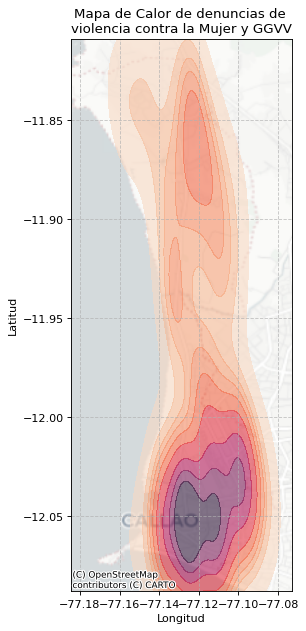

In [232]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Crear un mapa de calor con seaborn
sns.kdeplot(
    data=df_filtrado,
    x='LONGITUD',
    y='LATITUD',
    cmap='rocket_r',
    fill=True,
    alpha=0.6,
    ax=ax
)

# Añadir un mapa base
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron)

# Configurar límites
ax.set_xlim(df_filtrado['LONGITUD'].min() - 0.01, df_filtrado['LONGITUD'].max() + 0.01)
ax.set_ylim(df_filtrado['LATITUD'].min() - 0.01, df_filtrado['LATITUD'].max() + 0.01)

# Ajustar detalles del gráfico
plt.title('Mapa de Calor de denuncias de \nviolencia contra la Mujer y GGVV')
plt.xlabel('Longitud', fontsize=10)
plt.ylabel('Latitud', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Este gráfico de mapa de calor nos dice que la concentración de mayor cantidad de registros de denuncias se encuentras en la parte sur de Callao, no obstante este mapa de calor podría fallar en precisión debido a la escala y a la densidad de los datos. Por ello me apoyaré en un mapa de calor generado por folium. 

In [233]:
# Crear el mapa centrado en una ubicación promedio con zoom fijo
latitude_mean = df_filtrado['LATITUD'].mean()
longitude_mean = df_filtrado['LONGITUD'].mean()

# Crear el mapa y desactivar los controles de zoom
mapa = folium.Map(
    location=[latitude_mean, longitude_mean],
    zoom_start=14,
    control_scale=False,
    zoom_control=False,
    dragging = False,
    scrollWheelZoom=False,
    doubleClickZoom=False,
    touchZoom=False,
)

# Preparar los datos para el HeatMap
heat_data = df_filtrado[['LATITUD', 'LONGITUD']].values.tolist()

# Añadir el HeatMap al mapa
HeatMap(heat_data).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save(r'..\docs\mapa_de_calor_violencia_mujer_ggvv.html')

Este mapa muestra con mejor precisión los lugares donde se concentra la mayor cantidad de denuncias sobre VIOLENCIA A MUJERES Y GGVV.
Esto nos puede indicar que lugares son más propensos de recibir dichas denuncias y se puede generar estrategias para enfocar acciones que apunten a dichas zonas.
De igual forma, se recomienda más cantidad de datos para confirmar las ubicaciones más densas de este gráfico.

Ahora analizaré los casos de denuncias relacionadas a 'PATRIMONIO' y 'SEGURIDAD PUBLICA'

In [234]:
# Filtrar los datos por tipo de patrimonio y seguridad publica
df_filtrado = df[(df['TIPO'] == 'PATRIMONIO') | (df['TIPO'] == 'SEGURIDAD PUBLICA')]

Crearé un primer gráfico con SEABORN

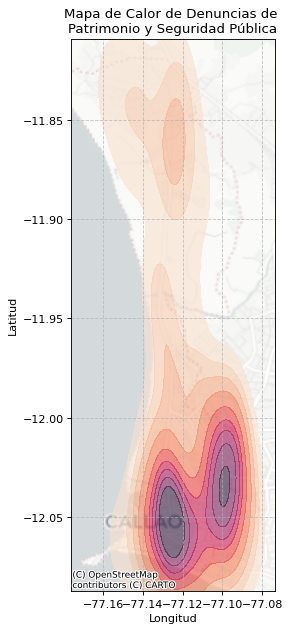

In [235]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Crear un mapa de calor con seaborn
sns.kdeplot(
    data=df_filtrado,
    x='LONGITUD',
    y='LATITUD',
    cmap='rocket_r',
    fill=True,
    alpha=0.6,
    ax=ax
)

# Añadir un mapa base
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron)

# Configurar límites
ax.set_xlim(df_filtrado['LONGITUD'].min() - 0.01, df_filtrado['LONGITUD'].max() + 0.01)
ax.set_ylim(df_filtrado['LATITUD'].min() - 0.01, df_filtrado['LATITUD'].max() + 0.01)

# Ajustar detalles del gráfico
plt.title('Mapa de Calor de Denuncias de \nPatrimonio y Seguridad Pública')
plt.xlabel('Longitud', fontsize=10)
plt.ylabel('Latitud', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se puede apreciar dos lugares muy fuertes de concentración de denuncias de estos tipos. Que son Callao y Carmen de la Legua.
Vamos a confirmarlo realizando un gráfico más preciso.

In [236]:
# Crear el mapa centrado en una ubicación promedio con zoom fijo
latitude_mean = df_filtrado['LATITUD'].mean()
longitude_mean = df_filtrado['LONGITUD'].mean()

# Crear el mapa y desactivar los controles de zoom
mapa = folium.Map(
    location=[latitude_mean, longitude_mean],
    zoom_start=14,
    control_scale=False,
    zoom_control=False,
    dragging = False,
    scrollWheelZoom=False,
    doubleClickZoom=False,
    touchZoom=False,
)

# Preparar los datos para el HeatMap
heat_data = df_filtrado[['LATITUD', 'LONGITUD']].values.tolist()

# Añadir el HeatMap al mapa
HeatMap(heat_data).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save(r'..\docs\mapa_de_calor_patrimonio_sspp.html')

Este último gráfico nos da con mayor precisión donde se encuentra la mayor cantidad de denuncias sobre PATRIMONIO y SEGURIDAD PUBLICA. Inclusive se puede identificar lugares más concetrados que otros y esto puede ayudar a diseñar estrategias para ubicar módulos de serenazgo o patrullaje.